In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,d,1
1,2,5,31/07/2015,6064,625,1,1,d,1
2,3,5,31/07/2015,8314,821,1,1,d,1
3,4,5,31/07/2015,13995,1498,1,1,d,1
4,5,5,31/07/2015,4822,559,1,1,d,1


In [4]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [5]:
train.shape

(1017209, 9)

In [6]:
train['StateHoliday'].value_counts()

d    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [7]:
store = pd.read_csv("store.csv")

In [8]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [10]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [11]:
categorical_level_unique = store['PromoInterval'].unique()

In [12]:
categorical_level_mapping = {PromoInterval: idx for idx, PromoInterval in enumerate(categorical_level_unique, 1)}

In [13]:
categorical_level_mapping

{nan: 1, 'Jan,Apr,Jul,Oct': 2, 'Feb,May,Aug,Nov': 3, 'Mar,Jun,Sept,Dec': 4}

In [14]:
store['PromoInterval'] = store['PromoInterval'].map(categorical_level_mapping)

In [15]:
store['PromoInterval'] = store['PromoInterval'].replace(1, np.nan)

In [16]:
# store['PromoInterval'] = store['PromoInterval'].replace(to_replace = 1, value = 'Nan')

In [17]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,2.0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,2.0
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [19]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                float64
dtype: object

In [20]:
store['PromoInterval'] = store['PromoInterval'].fillna(store['PromoInterval'].mode().iloc[0])

In [21]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                  0
dtype: int64

In [22]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)
store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].median(), inplace = True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].median(), inplace = True)
store['Promo2SinceWeek'].fillna(0, inplace = True)
store['Promo2SinceYear'].fillna(0, inplace = True)

In [23]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [24]:
df = pd.merge(train, store, how = 'left' , on = 'Store')

In [25]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31/07/2015,5263,555,1,1,d,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,2.0
1,2,5,31/07/2015,6064,625,1,1,d,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,2.0
2,3,5,31/07/2015,8314,821,1,1,d,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,2.0
3,4,5,31/07/2015,13995,1498,1,1,d,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,2.0
4,5,5,31/07/2015,4822,559,1,1,d,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,2.0


In [26]:
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [27]:
df.shape

(1017209, 18)

In [28]:
df['Date'] = pd.to_datetime(df['Date'])

In [29]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [30]:
del df['Date']

In [31]:
df.shape

(1017209, 20)

In [32]:
cat_cols = df.select_dtypes(include=['object']).columns

for i in cat_cols:
    print(i)
    print(df[i].value_counts())
    print('-'*20)

StateHoliday
d    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64
--------------------
StoreType
a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64
--------------------
Assortment
a    537445
c    471470
b      8294
Name: Assortment, dtype: int64
--------------------


In [33]:
df.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                float64
Day                            int64
Month                          int64
Year                           int64
dtype: object

In [34]:
df['StateHoliday'] = df['StateHoliday'].map({'a':1 , 'b':2 , 'c':3, 'd':4})
df['StateHoliday'] = df['StateHoliday'].astype(int)

In [35]:
# import re
# df['StoreType'] = re.split(r'\s',df['StoreType'])

In [36]:
df['StoreType'] = df['StoreType'].map({'a':1 , 'b':2 , 'c':3 , 'd':4})
df['StoreType'] = df['StoreType'].astype(int)

In [37]:
df['Assortment'] = df['Assortment'].map({'a':1 , 'b':2 , 'c':3})
df['Assortment'] = df['Assortment'].astype(int)

In [38]:
df['PromoInterval'] = df['PromoInterval'].astype(int)

In [39]:
df.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                   int32
SchoolHoliday                  int64
StoreType                      int32
Assortment                     int32
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int32
Day                            int64
Month                          int64
Year                           int64
dtype: object

In [60]:
X = df.drop(['Sales','Customers'],1)
#Transform Target Variable
y = np.log(df['Sales']+1)

from sklearn.model_selection import train_test_split
X_train , X_val , y_train , y_val = train_test_split(X , y , test_size=0.30 , random_state = 1 )

X_train.shape , X_val.shape , y_train.shape , y_val.shape

((712046, 18), (305163, 18), (712046,), (305163,))

In [41]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=11)
dt.fit(X_train , y_train)
y_pred_dt = dt.predict(X_val)

In [42]:
y_pred_dt = np.exp(y_pred_dt)-1
y_val = np.exp(y_val)-1

In [43]:
from sklearn.metrics import r2_score , mean_squared_error

print(r2_score(y_val , y_pred_dt))
print(np.sqrt(mean_squared_error(y_val , y_pred_dt)))

0.7120814348845043
2068.578135073657


In [61]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [62]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_pred_linear = lin_reg.predict(X_val)

In [69]:
train_pred = lin_reg.predict(X_train)

In [66]:
print(np.sqrt(mean_squared_error(y_val , y_pred_linear)))

0.35039212178269386


In [70]:
print(r2_score(y_val, y_pred_linear))
print(r2_score(y_train, train_pred))

0.9888010819859875
0.9887122072364134


In [83]:
dt_1 = DecisionTreeRegressor(criterion='mse',max_depth=2,max_leaf_nodes=2,min_samples_leaf=2,min_samples_split=2)
dt_1.fit(X_train , y_train)
y_pred_dt_1 = dt_1.predict(X_val)

In [84]:
train_pred_1 = dt_1.predict(X_train)

In [86]:
print(r2_score(y_val , y_pred_dt_1))
print(r2_score(y_train, train_pred_1))

0.9859814385406436
0.9859337949856912


In [87]:
print(np.sqrt(mean_squared_error(y_val , y_pred_dt_1)))

0.39202884703228646


In [89]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers

Using TensorFlow backend.


In [90]:
model = Sequential()

In [91]:
# Initialising the ANN
model = Sequential()    
model.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(p = 0.3))
model.add(Dense(units = 90, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.3))
model.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.3))
model.add(Dense(units = 90, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.3))
model.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(p = 0.3))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])
history = model.fit(X_train, y_train, batch_size = 10000, epochs = 15)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Epoch 1/15
712046/712046 [==============================] - 6s 9us/step - loss: 21.7443 - mean_squared_error: 21.7443 - mean_absolute_error: 3.7896 - mean_absolute_percentage_error: 989241876.8881
Epoch 2/15
712046/712046 [==============================] - 4s 6us/step - loss: 13.2544 - mean_squared_error: 13.2544 - mean_absolute_error: 2.8644 - mean_absolute_percentage_error: 1179394928.1589
Epoch 3/15
712046/712046 [==============================] - 4s 6us/step - loss: 12.9283 - mean_squared_error: 12.9283 - mean_absolute_error: 2.8056 - mean_absolute_percentage_error: 1184316764.7480: 3s -
Epoch 4/15
712046/712046 [==============================] - 5s 8us/step - loss: 12.7887 - mean_squared_error: 12.7887 - mean_absolute_error: 2.7858 - mean_absolute_percentage_error: 1183643325.4821
Epoch 5/15
712046/712046 [==============================] - 5s 6us/step - loss: 12.

In [92]:
# R-Square
y_pred = model.predict(X_val)
print(r2_score(y_val, y_pred))
# MSE
print(mean_squared_error(y_val, y_pred))
# MAE
print(mean_absolute_error(y_val, y_pred))

0.17242181499090048
9.07280621107691
2.786390425010572


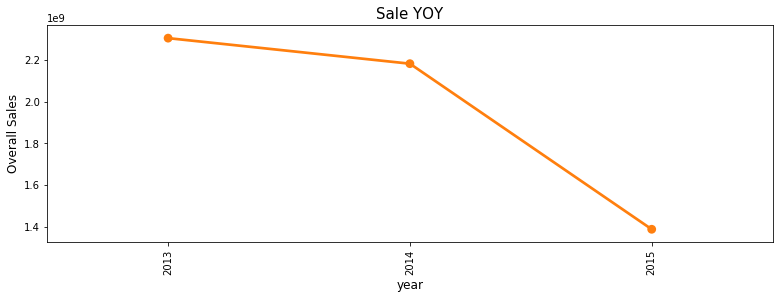

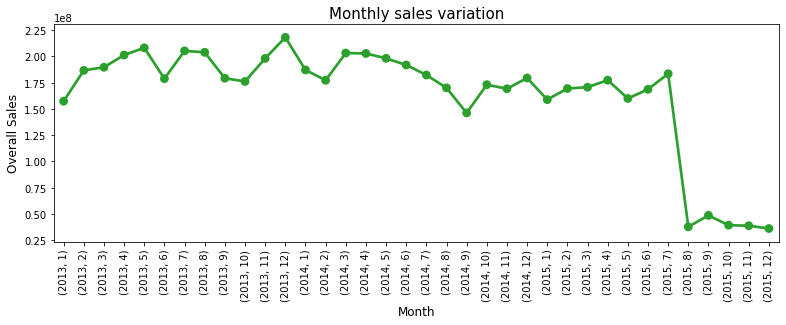

In [93]:
color = sns.color_palette()
temp=df.groupby('Year')['Sales'].sum()
plt.figure(figsize=(13,4))
sns.pointplot(temp.index,temp.values, alpha=0.8, color=color[1],)
plt.ylabel('Overall Sales', fontsize=12)
plt.xlabel('year', fontsize=12)
plt.title('Sale YOY', fontsize=15)
plt.xticks(rotation='vertical')

# month over month sales
temp=df.groupby(['Year','Month'])['Sales'].sum()
plt.figure(figsize=(13,4))
sns.pointplot(temp.index,temp.values, alpha=0.8, color=color[2],)
plt.ylabel('Overall Sales', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Monthly sales variation', fontsize=15)
plt.xticks(rotation='vertical')

plt.show()
plt.show()

In [94]:
train['SalesPerCustomer'] = train['Sales'] / train['Customers']

avg_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].mean()
avg_store.rename(columns=lambda x: 'Avg' + x, inplace=True)
store_eda = pd.merge(avg_store.reset_index(), store, on='Store')

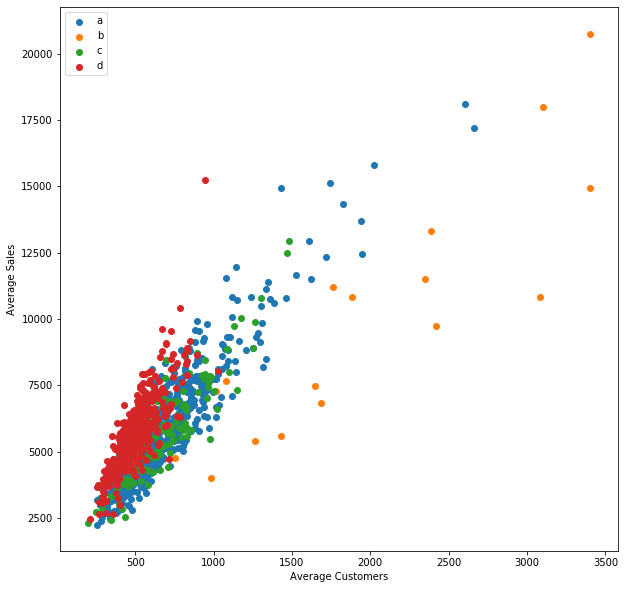

<Figure size 432x288 with 0 Axes>

In [95]:
plt.figure(figsize = (10,10))
for i in ['a', 'b', 'c', 'd']:
    data = store_eda[store_eda['StoreType'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()
plt.savefig('eda_store_1.png')

In [97]:
# Extracting data where stores were open
sales_when_store_open = train[train['Open'] == 1]

# Average sales by each Storeb
mean_sales = sales_when_store_open['Sales'].groupby(sales_when_store_open.Store).aggregate(np.mean)

# Average Customers per day in each store
customers_per_day = train['Customers'].groupby(train.DayOfWeek).aggregate(np.mean)

# Average Sales per day in each store
sales_per_day = train['Sales'].groupby(train.DayOfWeek).aggregate(np.mean)

# Average Sales per day in a week with respect to 'Open' stores
normalized_sales_per_day = sales_when_store_open['Sales'].groupby(sales_when_store_open.DayOfWeek).aggregate(np.mean)

# Average Count of customers per day with respect to 'Open' stores
normalized_customer_count = sales_when_store_open['Customers'].groupby(sales_when_store_open.DayOfWeek).aggregate(np.mean)

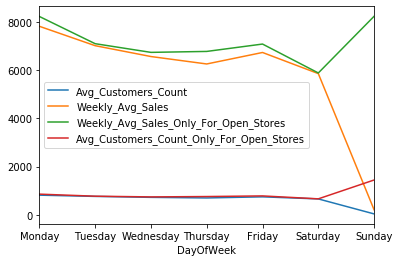

In [98]:

# Plot
x_axes = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(1, 1)

plt.xticks([1,2,3,4,5,6,7], x_axes)

#Renaming names of series
customers_per_day.name = 'Avg_Customers_Count'
sales_per_day.name = 'Weekly_Avg_Sales'
normalized_sales_per_day.name = 'Weekly_Avg_Sales_Only_For_Open_Stores'
normalized_customer_count.name = 'Avg_Customers_Count_Only_For_Open_Stores'

customers_per_day.plot(kind='line', legend=True)
sales_per_day.plot(kind='line', legend=True)
normalized_sales_per_day.plot(kind='line', legend=True)
normalized_customer_count.plot(kind='line', legend=True)

plt.savefig('eda_1.png')

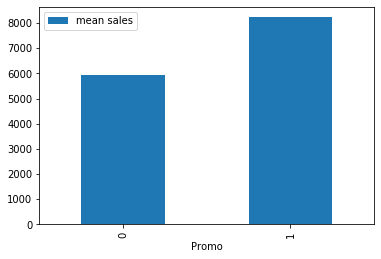

In [99]:
sales_by_promo = sales_when_store_open['Sales'].groupby(sales_when_store_open.Promo).aggregate(np.mean)
cust_by_promo = sales_when_store_open['Customers'].groupby(sales_when_store_open.Promo).aggregate(np.mean)
sales_by_promo.plot(kind='bar', label='mean sales')
plt.legend()
plt.savefig('eda_train_1.png')

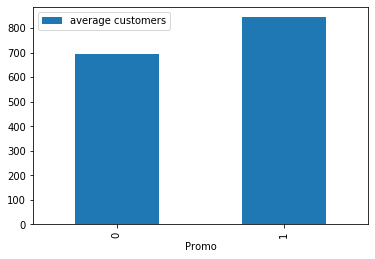

In [100]:
cust_by_promo.plot(kind='bar', label='average customers')
plt.legend()
plt.savefig('eda_train_2.png')